# Encuesta Nacional sobre Disponibilidad y Uso de Tecnologías de la Información en los Hogares (ENDUTIH) 2019

## Escribe el organismo que lo generó
 INEGI
## Incluye un enlace de Internet de dónde se pueden descargar en línea y envíalo como una hoja de cálculo junto con su informe correspondiente. 
https://www.inegi.org.mx/programas/dutih/2019/#Datos_abiertos

## Describe el conjunto de datos. ¿Qué datos contiene?

 El conjunto de datos contiene información relacionada a la población en Mexico la cual realizó una encuesta. La Encuesta Nacional sobre Disponibilidad y Uso de Tecnologías de la Información en los Hogares (ENDUTIH) 2019 tiene como finalidad obtener información sobre la disponibilidad y el uso de las tecnologías de información y comunicaciones en los hogares y su utilización por los individuos de seis años o más en México, para generar información estadística en el tema y apoyar la toma de decisiones en cuestión de políticas públicas; asimismo, ofrece elementos de análisis a estudios nacionales e internacionales y para el público en general interesado en la materia. A partir de esa base datos se realizó una extracción de las variables que tuvieran mayor relevancia quedando una base de datos mas pequeña. 

## Normalmente, los datos tienen un identificador que se incluye en el encabezado de la columna correspondiente. ¿Qué identificador no tiene claro su significado?¿Cómo podrías investigarlo?

En caso de no saber de manera específica cuales son los significados de las variables. En mi caso el INEGI al descargar el archivo, se obtiene una carpeta zip que contiene diferentes archivos en los cuales ademas de tener los de excel se encuentran de tipo texto, donde se explican las variables.

## ¿Cuáles son algunas de las preguntas podrías responder con estos datos? Enumera al menos tres (no respondas a las preguntas).

¿Cual es la probabilidad de que un hogar tenga internet?
 ¿Es importante el ingreso de las personas para que tengan internet?
¿Que tan relevante es el internet?

## ¿Qué stakeholder (empresa, sector de la sociedad, organismo descentralizado, gobierno, etc.) estaría interesado en las preguntas que identificaste en el punto 6?

Gobierno de Mexico 
 ,Empresas de consumo alimenticio
 ,Medios masivos de comunicación
 ,Escuelas
 e Industria en general



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt

In [2]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 80.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm

In [4]:
%ls datasets/

adult.csv                  census.csv        nhanes_2015_2016.csv
airline_data.csv           cwurData.csv      pokemon.csv
antropometria00.csv        data.csv          sample_pivot.csv
antropometria-dataset.csv  endutih_2019.csv  tips.csv
Canada.xlsx                headbrain.csv     weight-height.csv
Cartwheeldata.csv          movies.csv


## 1. ¿Cuál es la variable de interés a pronosticar?, ¿Qué se espera lograr con este proyecto?

In [5]:
df = pd.read_csv('datasets/endutih_2019.csv',
                 low_memory=False)
df.columns

Index(['folioviv', 'conex_inte', 'ing_cor', 'energia', 'comunica', 'menores'], dtype='object')

Para representar la probabilidad de que un hogar tenga internet o no tenga usaremos una variable
dependiente cualitativa, ya que refleja la cualidad de tener acceso a internet en un hogar o no tenerlo,
donde el “0” es que el hogar no tenga acceso a internet y “1” es que si tenga acceso a internet. Dicho
lo anterior, el modelo matemático planteado es el siguiente:
“inter = β0+ β1 (ing_cor)+ β2 (energia) + β3 (comunica) + β4 (menores)”

## 2. ¿Cuántas variables hay y de qué tipos son?, ¿Por qué es importante conocer esta información?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74647 entries, 0 to 74646
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   folioviv    74647 non-null  int64  
 1   conex_inte  74647 non-null  int64  
 2   ing_cor     74647 non-null  float64
 3   energia     74647 non-null  float64
 4   comunica    74647 non-null  float64
 5   menores     74647 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 3.4 MB


Lo primero a analizar son las dimensiones de la muestra: se cuenta con una cantidad de 6
variables y 74747 observaciones. La mitad de las variables son de tipo float y tipo int.
Es importante preguntarnos esto porque nos interesa que nuestro modelo de regresión
admita variables de tipo float, de lo contrario, las variables int cambian la gráfica esperada.

Descripción de las variables:
1) HOGARES CON ACCESO A INTERNET: conex_inte Hogares quecuentan con el servicio de internet.
2) INGRESO TOTAL MENSUAL: ing_cor Suma de los ingresos por trabajo, los provenientes de rentas,
de transferencias, de estimaciÛn del alquiler y de otros ingresos.
3) GASTO MENSUAL EN ENERGÍA : energía Gasto en electricidad y combustibles.
4) GASTO MENSUAL EN COMUNICACIONES: comunica Gasto en comunicaciones.
5) MENORES DE EDAD: menores Integrantes del hogar que tienen 11 o menos años de edad

## 3 ¿Qué distribución sigue la variable de interés ('conex_inte')?

In [7]:
df.describe()

,folioviv,conex_inte,ing_cor,energia,comunica,menores
count,7.464700e+04,74647.000000,7.464700e+04,74647.000000,74647.000000,74647.000000
mean,1.615773e+09,1.657200,4.604388e+04,1349.014768,1227.033406,0.760995
std,9.304964e+08,0.474649,6.123405e+04,1434.022067,2020.818334,1.008344
min,1.000136e+08,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.046809e+08,1.000000,2.034539e+04,390.000000,290.320000,0.000000
50%,1.562232e+09,2.000000,3.357348e+04,1050.000000,600.000000,0.000000
75%,2.403852e+09,2.000000,5.519646e+04,1865.155000,1730.320000,1.000000
max,3.260799e+09,2.000000,4.501830e+06,58298.510000,137700.000000,11.000000


Nuestra variable de interés se encuentra en un rango entre (1,2), lo cual representa si el hogar
cuenta con internet donde 1 es sí y 2 es no. En ese rango en el que se encontrará nuestro
pronóstico de regresión.

##  4. ¿Qué tipo de distribución sigue la variable de interés ('conex_inte')?


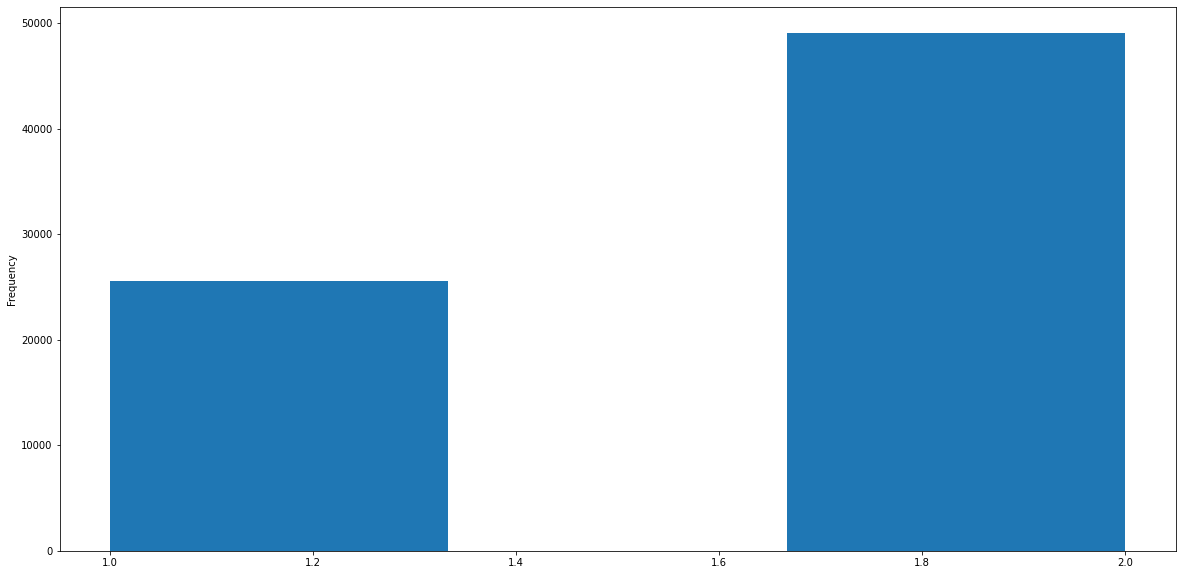

In [8]:
df['conex_inte'].plot(kind = 'hist',
                   figsize= (20,10),
                      bins=3
                

## 5. ¿Cuál es la distribución del resto de variables?

¿Cuál es la probabilidad de que un hogar tenga internet?


{1 =  tener acceso a internet
{0 = otro caso

Se observa que tiende a una distribución plana

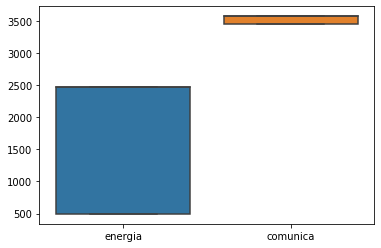

In [16]:
sns.boxplot(data = df.loc[df['conex_inte'],
 ['energia', 'comunica']])

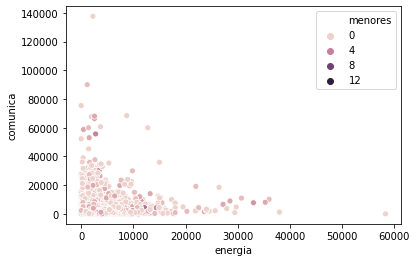

In [10]:
sns.scatterplot(x='energia',
                y='comunica',
                hue='menores',
                data=df)

En este diagrama se observa la tendencia de las variables que estan mas orientados hacia la variable del gasto de energia

In [11]:
df.corr()

,folioviv,conex_inte,ing_cor,energia,comunica,menores
folioviv,1.000000,0.051958,-0.055600,-0.044578,-0.049198,-0.001638
conex_inte,0.051958,1.000000,-0.300073,-0.274279,-0.427074,0.078293
ing_cor,-0.055600,-0.300073,1.000000,0.358776,0.373262,-0.002826
energia,-0.044578,-0.274279,0.358776,1.000000,0.287395,0.007870
comunica,-0.049198,-0.427074,0.373262,0.287395,1.000000,-0.039514
menores,-0.001638,0.078293,-0.002826,0.007870,-0.039514,1.000000


## 8. ¿Qué tan bueno es el análisis de regresión para 'conex_inte' en función de 'menores'?

A partir de la información, existe una variable que resalta sobre las demás, esta es "menores", la
cual será la mejor opción para construir una función de regresión de la siguiente manera:
conex_inte = B0 + B1 * menores

In [12]:
model = sm.OLS.from_formula('conex_inte~menores',data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conex_inte   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     460.4
Date:                Thu, 21 Oct 2021   Prob (F-statistic):          8.10e-102
Time:                        02:43:46   Log-Likelihood:                -50064.
No. Observations:               74647   AIC:                         1.001e+05
Df Residuals:                   74645   BIC:                         1.002e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6292      0.002    750.822      0.000       1.625       1.633
menores        0.0369      0.002     21.456      0.000       0.033       0.040
==============================================================================
Omnibus:                   408066.050   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12760.498
Skew:                          -0.655   Prob(JB):                         0.00
Kurtosis:                       1.454   Cond. No.                         2.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""